# Preprocess Data and EDA.

Import necessary libraries.

In [25]:
import ast
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud

%matplotlib inline

Define supporting functions.

In [2]:
"""
This function to to format the HTML content in job description.
"""
def clean_html_text(raw_html: str) -> str:
    if not isinstance(raw_html, str):
        return ""
    
    # Parse HTML
    soup = BeautifulSoup(raw_html, "html.parser")
    text = soup.get_text(separator="\n")
    
    # Replace HTML entities and unwanted chars
    text = text.replace(u'\xa0', ' ')
    text = re.sub(r'&[a-z]+;', ' ', text)
    
    # Fix bullet characters
    text = re.sub(r'[\u2022\u2023\u25E6\u2043\u2219•]', '-', text)
    text = re.sub(r'&bull;', '-', text)
    
    # Normalize spacing and line breaks
    text = re.sub(r'\n+', '\n', text)
    text = re.sub(r'\s{2,}', ' ', text)
    text = re.sub(r'\s*-\s*', ' - ', text)
    text = text.strip()
    
    # # Optional: remove contact info
    # text = re.sub(r'\b\d{8,}\b', '[PHONE]', text)
    # text = re.sub(r'\S+@\S+', '[EMAIL]', text)
    
    return text

Format the whole dataframe. 

In [ ]:
# Parse column "content" into formatted string.
df = pd.read_csv("job-description-data/ads-50k.csv")
df['job_description_clean'] = df['content'].apply(clean_html_text)

In [4]:
# Split the Metadata column into separate columns for clear information.
df['job_metadata'] = df['metadata'].apply(lambda x: ast.literal_eval(x))
df['classification'] = df['job_metadata'].apply(lambda x: x.get('classification', {}).get('name'))
df['subClassification'] = df['job_metadata'].apply(lambda x: x.get('subClassification', {}).get('name'))
df['area'] = df['job_metadata'].apply(lambda x: x.get('area', {}).get('name'))
df['location'] = df['job_metadata'].apply(lambda x: x.get('location', {}).get('name'))
df['suburb'] = df['job_metadata'].apply(lambda x: x.get('suburb', {}).get('name'))
df['workType'] = df['job_metadata'].apply(lambda x: x.get('workType', {}).get('name'))

In [ ]:
# Sample 50 rows to check the quality.
df_random_rows = df.sample(n=50, random_state=42)
df_random_rows.to_csv("job-description-data/df_random_rows.csv", index=False)

Google Sheet

https://docs.google.com/spreadsheets/d/1Mraks4rIDGnHSIaDqaxsFdWyGINFynuYcS3MUDJqe1E/edit?usp=sharing 

"""

Original Content

<HTML><p><strong>About the business</strong></p> <p> <p>Blackrose bar &amp; cafe is a Italian style cafe / restaurant operating for 22 years in the same location , we serve excellent food and have a great reputation in the local community.&nbsp;</p> <p> <p><strong>About the role</strong></p> <p> <p>Knowledge and skills with Italian food, pizzas,&nbsp;pasta, seafood and meats,&nbsp;Must be available both days on the weekend be able to run and work In a team environment&nbsp;and work unsupervised. Able to work&nbsp;in a fast paced environment. Must love what they do.&nbsp;we have a great passion for our work and we are proud of our product. We are a small venue with a team of 3 kitchen staff and growing. 5 days a week will be the required work week.&nbsp;</p> <p> <p><strong>Benefits and perks</strong></p> <p> <p>Working under a highly skilled chef and&nbsp;passionate chef with experience In Europe. Working close to home in a modern newly fitted out kitchen,&nbsp;&nbsp;motivated operated.&nbsp;</p> <p> <p><strong>Skills and experience</strong></p> <p> <p>Must have a least 5 years experience in a commercial kitchen.&nbsp;</p> <p></HTML>

"""

"""

Clean Job Description

About the business Blackrose bar & cafe is a Italian style cafe / restaurant operating for 22 years in the same location , we serve excellent food and have a great reputation in the local community. About the role Knowledge and skills with Italian food, pizzas, pasta, seafood and meats, Must be available both days on the weekend be able to run and work In a team environment and work unsupervised. Able to work in a fast paced environment. Must love what they do. we have a great passion for our work and we are proud of our product. We are a small venue with a team of 3 kitchen staff and growing. 5 days a week will be the required work week. Benefits and perks Working under a highly skilled chef and passionate chef with experience In Europe. Working close to home in a modern newly fitted out kitchen, motivated operated. Skills and experience Must have a least 5 years experience in a commercial kitchen.

"""

"""

Original MetaData

{'additionalSalaryText': '$60,000 - $64,999', 'classification': {'name': 'Hospitality & Tourism'}, 'subClassification': {'name': 'Chefs/Cooks'}, 'area': {'name': 'South West & M5 Corridor'}, 'location': {'name': 'Sydney'}, 'suburb': {'name': 'Liverpool'}, 'workType': {'name': 'Full Time'}}

"""

"""

classification: Hospitality & Tourism

subClassification: Chefs/Cooks

area: South West & M5 Corridor

location: Sydney

suburb: Liverpool

workType: Full Time


"""

In [6]:
print("Full Columns: \n", df.columns, "\n")
df.drop(["content", "metadata", "job_metadata"], axis=1, inplace=True)
df.head()

Full Columns: 
 Index(['id', 'title', 'abstract', 'content', 'metadata',
       'job_description_clean', 'job_metadata', 'classification',
       'subClassification', 'area', 'location', 'suburb', 'workType'],
      dtype='object') 



id                                              title  \
0  38915469                             Recruitment Consultant   
1  38934839                     Computers Salesperson - Coburg   
2  38946054                              Senior Developer | SA   
3  38833950  Senior Commercial Property Manager | Leading T...   
4  38856271               Technology Manager | Travel Industry   

                                            abstract  \
0  We are looking for someone to focus purely on ...   
1  Passionate about exceptional customer service?...   
2  Readifarians are known for discovering the lat...   
3  ~ Rare opportunity for a Senior PM to step int...   
4  Rare opportunity for an experienced Technology...   

                               job_description_clean  \
0  Are you looking to join a thriving business th...   
1  · Casual hours as required (transition to Part...   
2  Readify helps organizations innovate with tech...   
3  WayPoint Recruitment have partnered up with a ...   
4  This is a key role within a market leading Tra...   

                           classification  \
0                    Education & Training   
1              Retail & Consumer Products   
2  Information & Communication Technology   
3                  Real Estate & Property   
4  Information & Communication Technology   

                           subClassification                 area   location  \
0                                      Other                 None     Sydney   
1                          Retail Assistants     Northern Suburbs  Melbourne   
2                                Consultants                 None   Adelaide   
3  Commercial Sales, Leasing & Property Mgmt  CBD & Inner Suburbs  Melbourne   
4                                 Management                 None   Auckland   

      suburb         workType  
0       None        Full Time  
1     Coburg  Casual/Vacation  
2       None        Full Time  
3  Melbourne        Full Time  
4       None        Full Time

EDA and Get conclusions.

In [8]:
"""
Location and work type are really useful and has no None.
There may be some duplications.
"""
df.describe(include='all')

id            title abstract  \
count   5.000000e+04            50000    50000   
unique           NaN            36207    46052   
top              NaN  Project Manager        .   
freq             NaN              194       27   
mean    3.891201e+07              NaN      NaN   
std     7.410446e+04              NaN      NaN   
min     3.465109e+07              NaN      NaN   
25%     3.887054e+07              NaN      NaN   
50%     3.891827e+07              NaN      NaN   
75%     3.896117e+07              NaN      NaN   
max     3.908507e+07              NaN      NaN   

                                    job_description_clean  \
count                                               50000   
unique                                              47485   
top     At ALDI, our people are the key to our success...   
freq                                                   25   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                classification subClassification  \
count                                    50000             50000   
unique                                      30               337   
top     Information & Communication Technology             Other   
freq                                      5235              2688   
mean                                       NaN               NaN   
std                                        NaN               NaN   
min                                        NaN               NaN   
25%                                        NaN               NaN   
50%                                        NaN               NaN   
75%                                        NaN               NaN   
max                                        NaN               NaN   

                       area location  suburb   workType  
count                 32844    50000   37002      50000  
unique                   69       87    2546          4  
top     CBD & Inner Suburbs   Sydney  Sydney  Full Time  
freq                   7092    13215    5373      34858  
mean                    NaN      NaN     NaN        NaN  
std                     NaN      NaN     NaN        NaN  
min                     NaN      NaN     NaN        NaN  
25%                     NaN      NaN     NaN        NaN  
50%                     NaN      NaN     NaN        NaN  
75%                     NaN      NaN     NaN        NaN  
max                     NaN      NaN     NaN        NaN

Remove duplications.

In [9]:
df_no_duplicates = df[["title", "abstract", "job_description_clean", "classification", "subClassification", "area", "location", "suburb", "workType"]].drop_duplicates()
df_no_duplicates.describe(include='all')

title abstract  \
count             49375    49375   
unique            36207    46052   
top     Project Manager        .   
freq                186       27   

                                    job_description_clean  \
count                                               49375   
unique                                              47485   
top     At ALDI, our people are the key to our success...   
freq                                                   24   

                                classification subClassification  \
count                                    49375             49375   
unique                                      30               337   
top     Information & Communication Technology             Other   
freq                                      5167              2660   

                       area location  suburb   workType  
count                 32373    49375   36556      49375  
unique                   69       87    2546          4  
top     CBD & Inner Suburbs   Sydney  Sydney  Full Time  
freq                   6989    12942    5236      34430

In [ ]:
# # Save new dataframe with clean contents, clear labels, and no duplications.
# df_no_duplicates.to_csv("job-description-data/df_no_duplicates.csv", index=False)

Classification is highly related to industry. Get more information about it.

In [12]:
print("Number of unique classifications:\n", len(df_no_duplicates["classification"].unique()), "\n")
print("Unique classifications are as follows:\n")
df_no_duplicates["classification"].unique()

Number of unique classifications:
 30 

Unique classifications are as follows:



array(['Education & Training', 'Retail & Consumer Products',
       'Information & Communication Technology', 'Real Estate & Property',
       'Mining, Resources & Energy', 'Accounting',
       'Community Services & Development',
       'Manufacturing, Transport & Logistics', 'Hospitality & Tourism',
       'Engineering', 'Sales', 'Marketing & Communications',
       'Healthcare & Medical', 'Banking & Financial Services',
       'Human Resources & Recruitment', 'Trades & Services',
       'Construction', 'Advertising, Arts & Media',
       'Administration & Office Support', 'Sport & Recreation',
       'Call Centre & Customer Service', 'Legal', 'Consulting & Strategy',
       'Government & Defence', 'Science & Technology',
       'Design & Architecture', 'Farming, Animals & Conservation',
       'CEO & General Management', 'Insurance & Superannuation',
       'Self Employment'], dtype=object)

In [13]:
classification_hist = df_no_duplicates.groupby(["classification"]).count()[["title"]]
classification_hist.sort_values(by='title', ascending=False, inplace=True)
classification_hist

title
classification                               
Information & Communication Technology   5167
Trades & Services                        4673
Healthcare & Medical                     4538
Manufacturing, Transport & Logistics     3173
Accounting                               2823
Administration & Office Support          2517
Hospitality & Tourism                    2452
Sales                                    2447
Education & Training                     2317
Construction                             2242
Retail & Consumer Products               1912
Engineering                              1724
Government & Defence                     1688
Mining, Resources & Energy               1421
Community Services & Development         1333
Marketing & Communications               1300
Human Resources & Recruitment            1245
Legal                                    1097
Call Centre & Customer Service           1023
Banking & Financial Services              973
Real Estate & Property                    881
Design & Architecture                     515
Insurance & Superannuation                383
Science & Technology                      303
Sport & Recreation                        272
Consulting & Strategy                     258
Advertising, Arts & Media                 258
Farming, Animals & Conservation           250
CEO & General Management                  178
Self Employment                            12

Location and work types are also important.

In [14]:
location_hist = df_no_duplicates.groupby(["location"]).count()[["title"]]
location_hist.sort_values(by='title', ascending=False, inplace=True)
location_hist

title
location                   
Sydney                12942
Melbourne             10492
Brisbane               4285
Auckland               3406
Perth                  2923
...                     ...
Americas                  4
Middle East & Africa      4
Ireland                   1
Europe & Russia           1
Rest of the UK            1

[87 rows x 1 columns]

In [15]:
work_type_hist = df_no_duplicates.groupby(["workType"]).count()[["title"]]
work_type_hist.sort_values(by='title', ascending=False, inplace=True)
work_type_hist

title
workType              
Full Time        34430
Contract/Temp     8423
Part Time         3273
Casual/Vacation   3249

<Axes: >

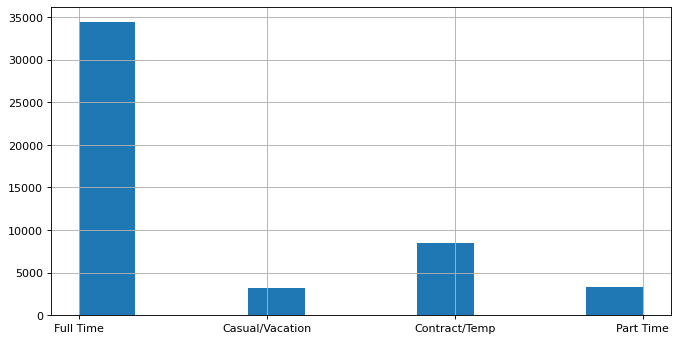

In [16]:
fig=plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
df_no_duplicates.workType.hist()

Get the most popular words in job description for each classification.


*** Education & Training ***



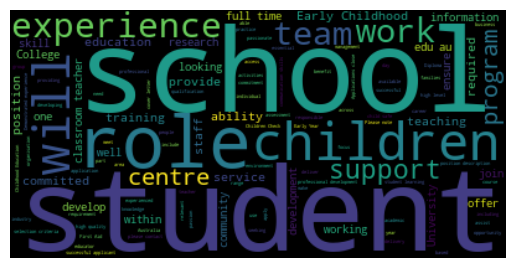


*** Retail & Consumer Products ***



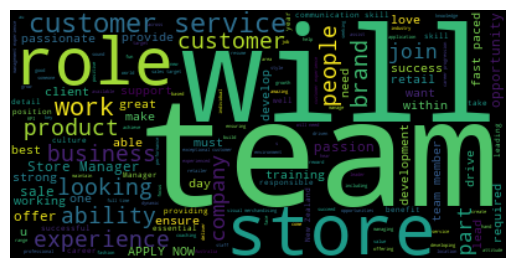


*** Information & Communication Technology ***



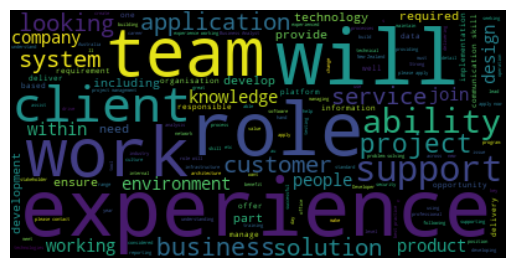


*** Real Estate & Property ***



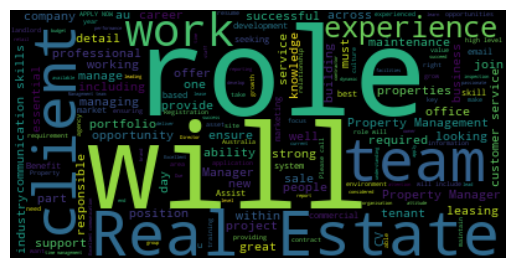


*** Mining, Resources & Energy ***



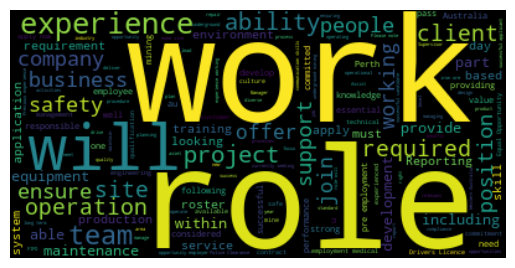


*** Accounting ***



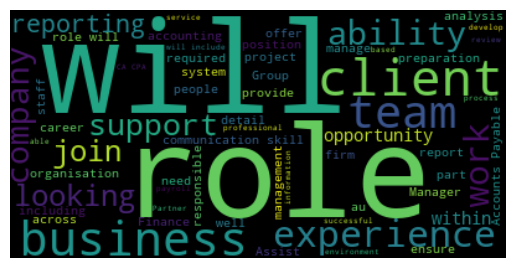


*** Community Services & Development ***



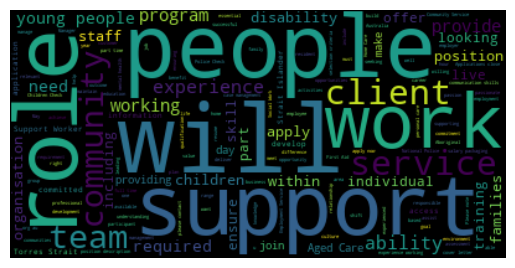


*** Manufacturing, Transport & Logistics ***



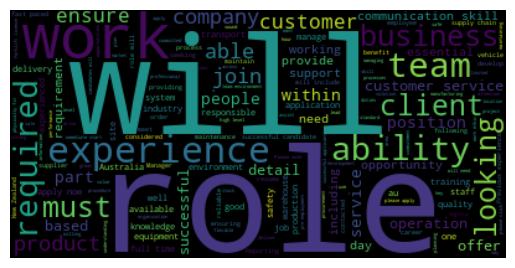


*** Hospitality & Tourism ***



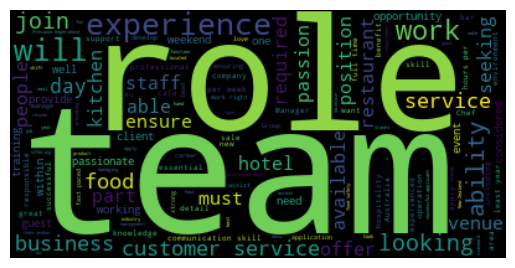


*** Engineering ***



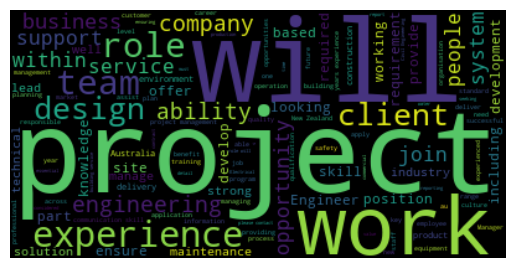


*** Sales ***



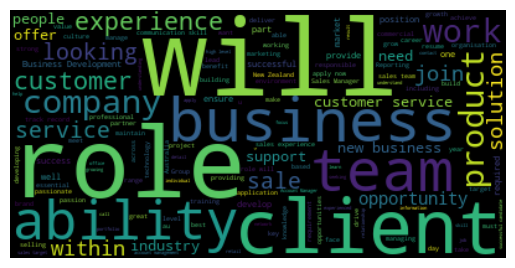


*** Marketing & Communications ***



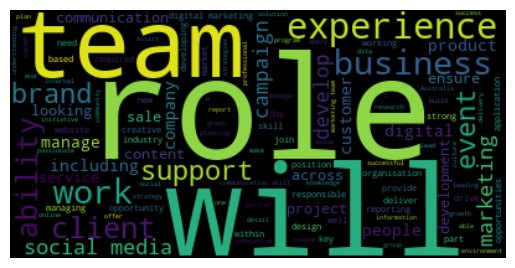


*** Healthcare & Medical ***



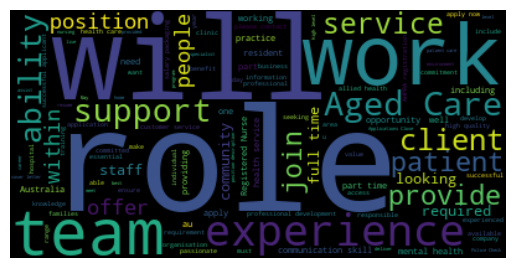


*** Banking & Financial Services ***



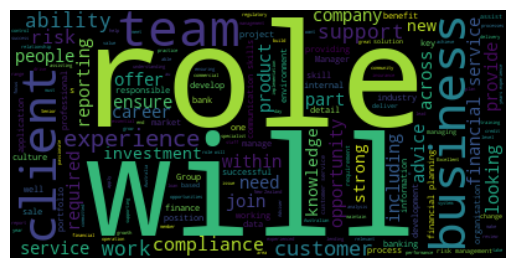


*** Human Resources & Recruitment ***



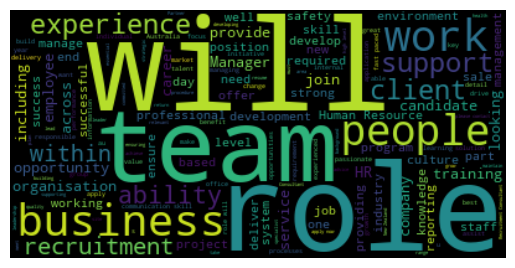


*** Trades & Services ***



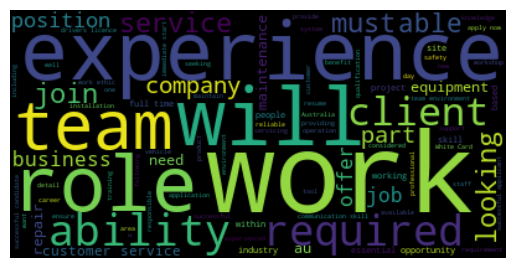


*** Construction ***



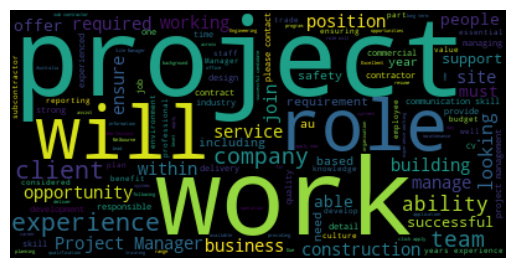


*** Advertising, Arts & Media ***



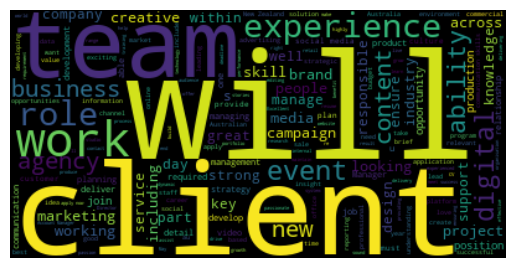


*** Administration & Office Support ***



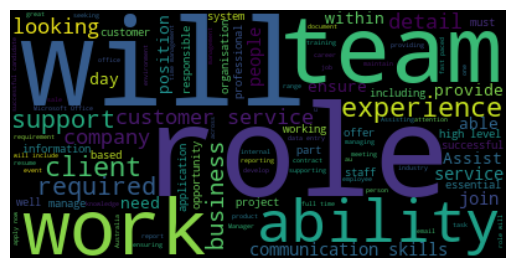


*** Sport & Recreation ***



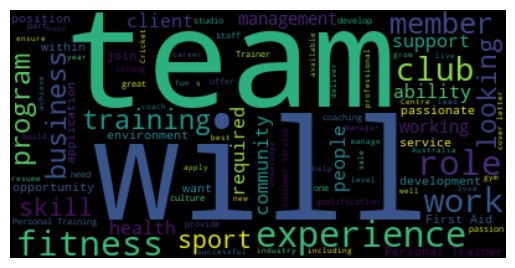


*** Call Centre & Customer Service ***



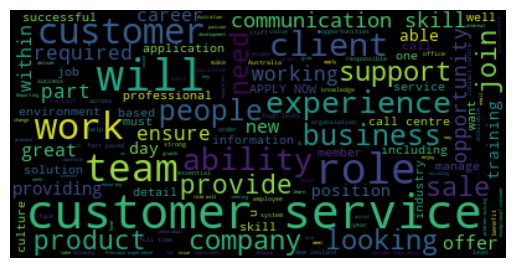


*** Legal ***



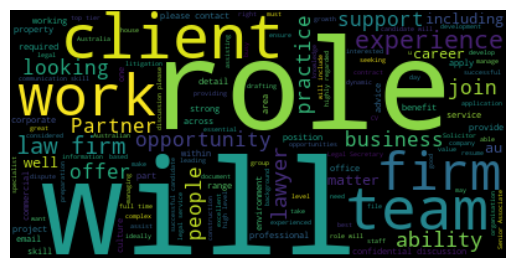


*** Consulting & Strategy ***



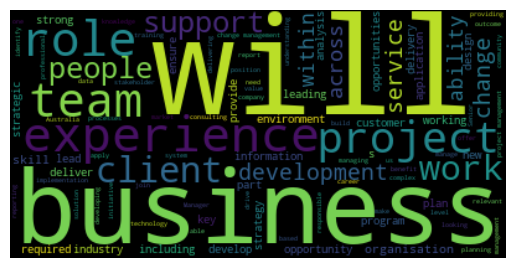


*** Government & Defence ***



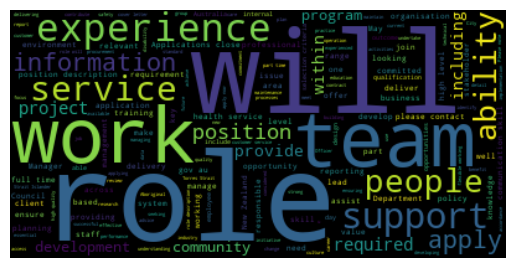


*** Science & Technology ***



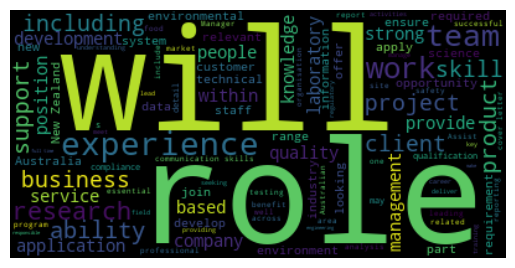


*** Design & Architecture ***



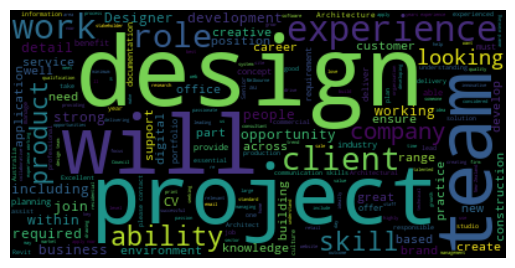


*** Farming, Animals & Conservation ***



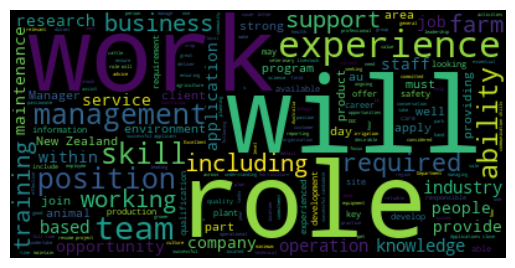


*** CEO & General Management ***



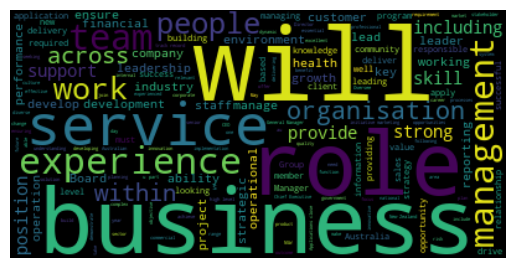


*** Insurance & Superannuation ***



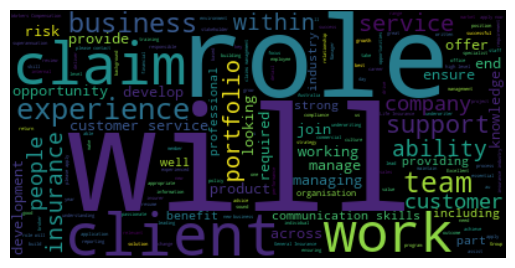


*** Self Employment ***



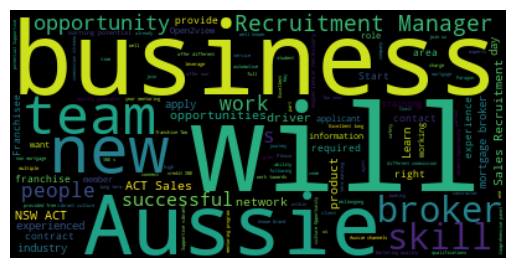

In [18]:
classification_list = df_no_duplicates.classification.unique().tolist()

for classification in classification_list:
    # Start with one review:
    filtered_df = df_no_duplicates[df_no_duplicates.classification == classification]
    job_descriptions = " ".join(filtered_df["job_description_clean"].tolist())
    # Create and generate a word cloud image:
    wordcloud = WordCloud().generate(job_descriptions)
    print("\n***",classification,"***\n")
    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

Each industry has different popular words, but there are some common ones:

team, support, manager, experience, client, customer, business.

It indicates that we can design workflow to generate 2 sets of skills:

1. General skills.

2. Industry specific skills.

Generate train and testing datasets.

The best way is to ensure that each industry has some samples in both datasets.

However, in this use case, to reduce the testing label workload, I simply use typical train test splitting.

In [24]:
sample_setting = classification_hist.reset_index()
sample_setting["sample_size"] = np.round(sample_setting["title"]*0.1)
sample_setting.rename(columns={"title": "total_number"})

classification  total_number  sample_size
0   Information & Communication Technology          5167        517.0
1                        Trades & Services          4673        467.0
2                     Healthcare & Medical          4538        454.0
3     Manufacturing, Transport & Logistics          3173        317.0
4                               Accounting          2823        282.0
5          Administration & Office Support          2517        252.0
6                    Hospitality & Tourism          2452        245.0
7                                    Sales          2447        245.0
8                     Education & Training          2317        232.0
9                             Construction          2242        224.0
10              Retail & Consumer Products          1912        191.0
11                             Engineering          1724        172.0
12                    Government & Defence          1688        169.0
13              Mining, Resources & Energy          1421        142.0
14        Community Services & Development          1333        133.0
15              Marketing & Communications          1300        130.0
16           Human Resources & Recruitment          1245        124.0
17                                   Legal          1097        110.0
18          Call Centre & Customer Service          1023        102.0
19            Banking & Financial Services           973         97.0
20                  Real Estate & Property           881         88.0
21                   Design & Architecture           515         52.0
22              Insurance & Superannuation           383         38.0
23                    Science & Technology           303         30.0
24                      Sport & Recreation           272         27.0
25                   Consulting & Strategy           258         26.0
26               Advertising, Arts & Media           258         26.0
27         Farming, Animals & Conservation           250         25.0
28                CEO & General Management           178         18.0
29                         Self Employment            12          1.0

In [28]:
X_train, X_test = train_test_split(df_no_duplicates, test_size=0.01, random_state=42)
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

In [ ]:
# Save train test data.
X_train.to_csv("job-description-data/X_train.csv", index=False)
X_test.to_csv("job-description-data/X_test.csv", index=False)